In [183]:
import pandas as pd
import generate_nnr_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from statistics import mean, variance
from scipy import stats
from scipy.stats import norm
from collections import Counter
import copy

In [91]:
"""データ生成"""

def csv_to_data(directory, data_n):
    data = []
    
    for i in range(1, data_n+1):
        tmp_data = pd.read_csv(directory+'/s'+str(i)+'.csv', header=None).values
        data.append(tmp_data)
    
    return np.array(data)


def csv_to_aged_data(directory, aged_data_n):
    aged_data = []

    for i in range(1, aged_data_n+1):
        tmp_data = pd.read_csv(directory+'/s'+str(i)+'_aged.csv', header=None).values
        aged_data.append(tmp_data)
        
    return np.array(aged_data)


def generate_data(directory, data_n, aged_data_n):
    data = csv_to_data(directory, data_n)
    aged_data = csv_to_aged_data(directory, aged_data_n)
    
    return data, aged_data

In [92]:
"""０の数"""

data, aged_data = generate_data('fresh_aged_ieice', 50, 2)


print('fresh')
for i in range(50):
    a = (data[i].shape[0] * data[i].shape[1]) - np.count_nonzero(data[i])
    print(a)
    
print('-------------')
    
print('aged')
for i in range(2):
    a = (aged_data[i].shape[0] * aged_data[i].shape[1]) - np.count_nonzero(aged_data[i])
    print(a)

fresh
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
-------------
aged
915
915


In [93]:
"""dataの0->None"""

check = []

for i in range(data.shape[0]):
    tmp = []
    for j in range(data[i].shape[0]):
        for k in range(data[i].shape[1]):
            if data[i, j, k] == 0:
                tmp.append([j,k])
                data[i, j, k] = None
                
    check.append(tmp)

In [94]:
"""０場所が全部一緒か確認"""

check = np.array(check)

flag = True
for i in range(check.shape[0]):
    for j in range(i+1,check.shape[0]):
        if not (check[i] == check[j]).all():
            flag = False

if flag is True:
    print('ok')

ok


In [95]:
"""aged_dataの0->None"""

for i in range(aged_data.shape[0]):
    for j in range(check[0].shape[0]):
        aged_data[i, check[0, j, 0], check[0, j, 1]] = None

In [99]:
"""nanの数"""

print('fresh')
for i in range(data.shape[0]):
    counter = 0
    for j in range(data[i].shape[0]):
        for k in range(data[i].shape[1]):
            if np.isnan(data[i,j,k]):
                counter += 1
                
    print(counter)
                
    
print('-------------')
    
print('aged')
for i in range(aged_data.shape[0]):
    counter = 0
    for j in range(aged_data[i].shape[0]):
        for k in range(aged_data[i].shape[1]):
            if np.isnan(aged_data[i,j,k]):
                counter += 1
                
    print(counter)

fresh
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
-------------
aged
920
920


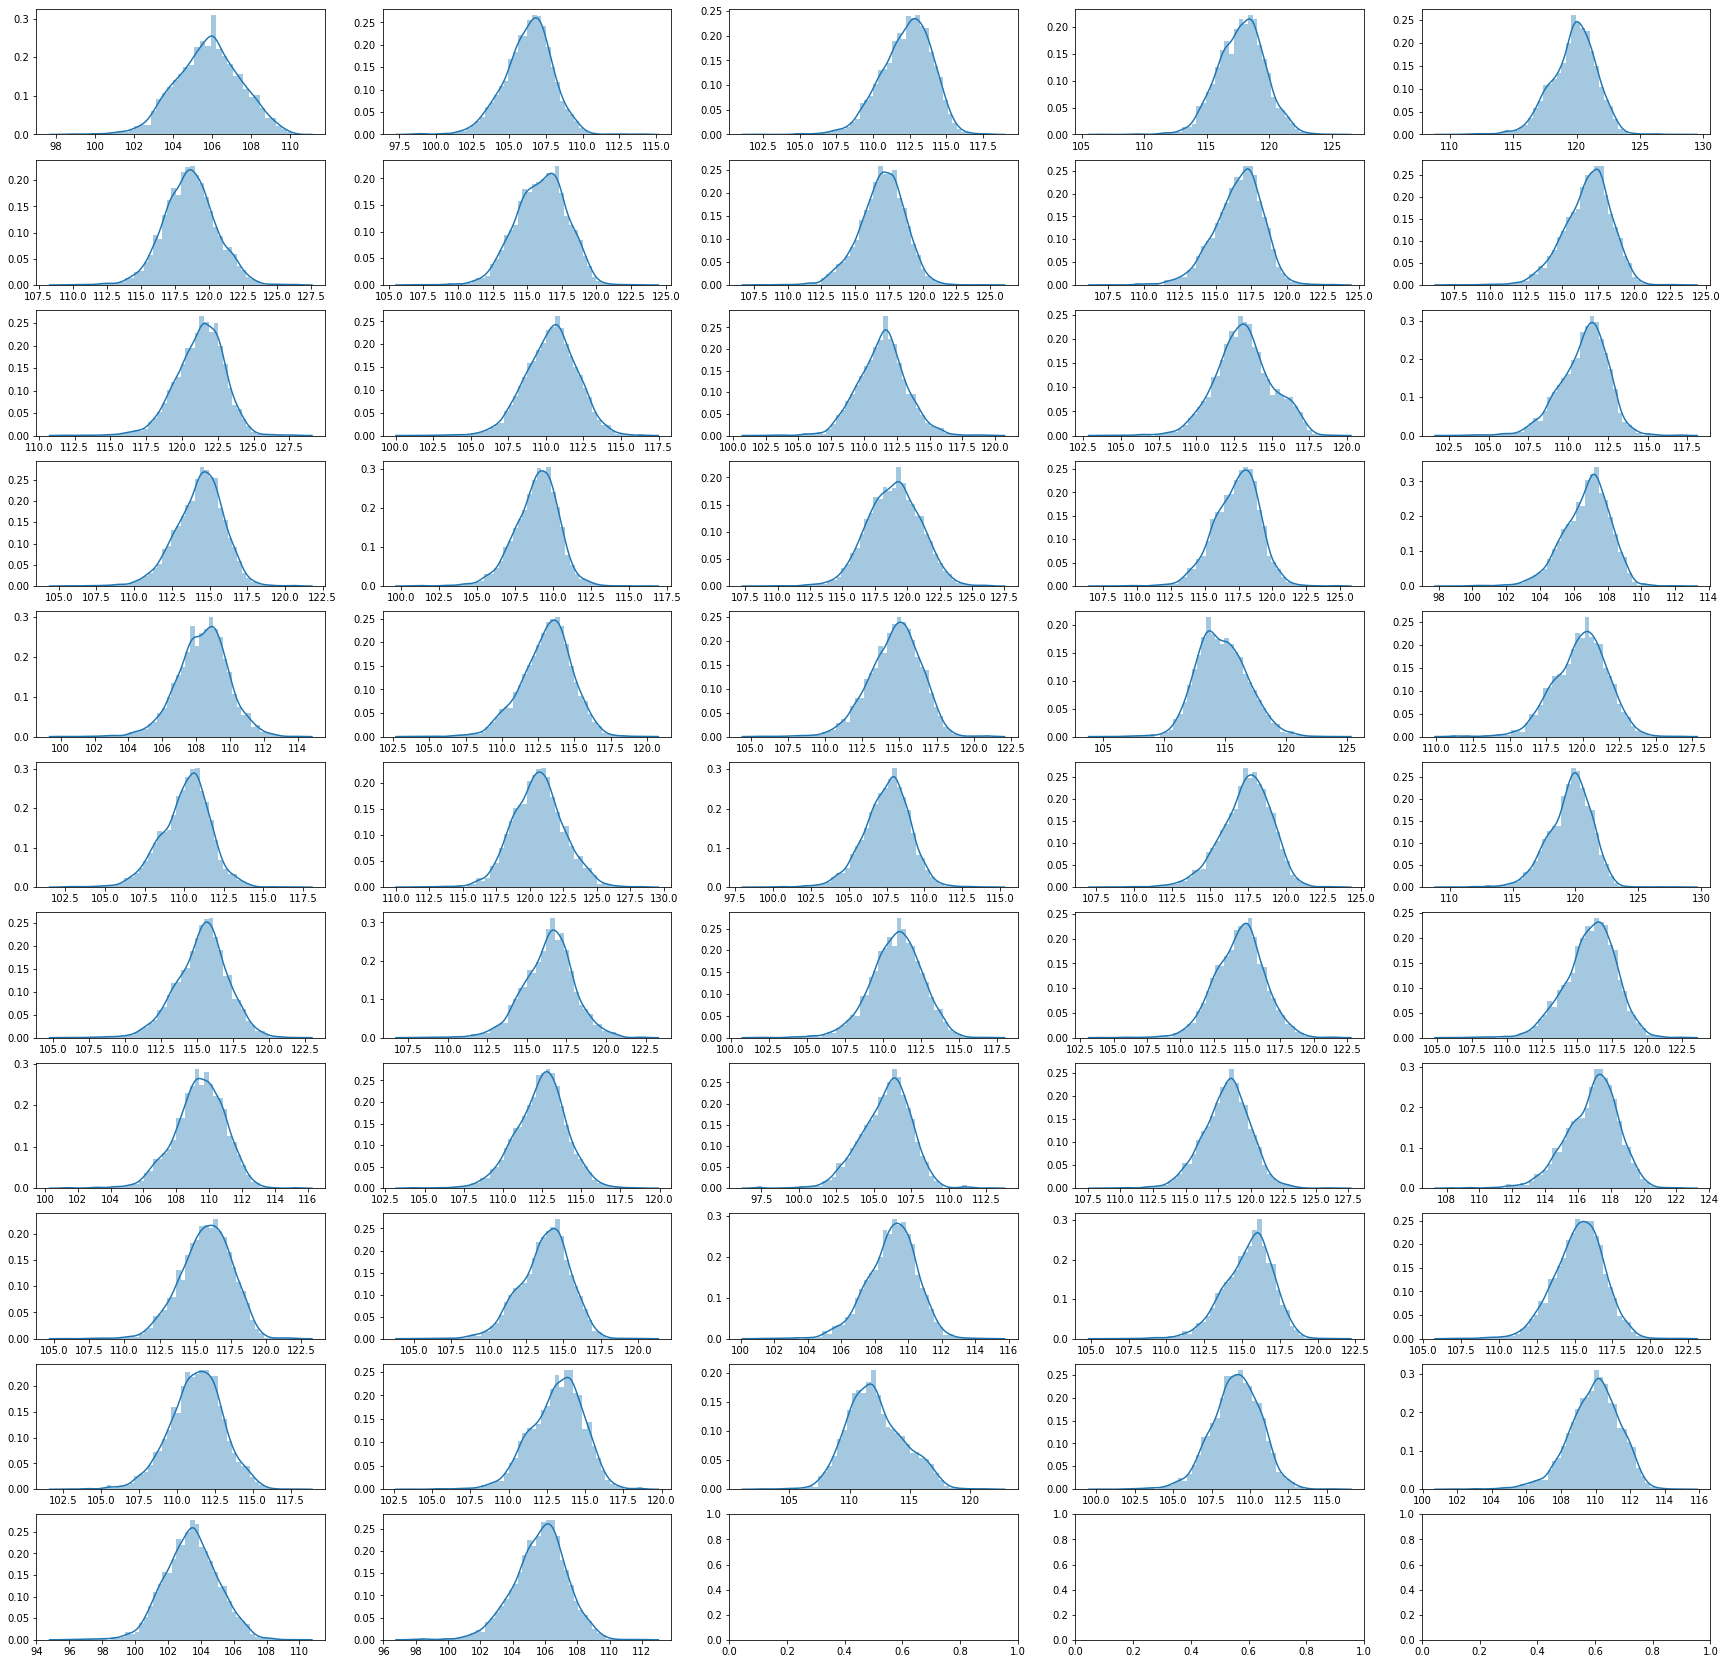

In [122]:
"""オリジナルデータを可視化
青のバー: データから作成したヒストグラム
青の折れ線: データの母集団分布をカーネル密度推定 (kernel density estimation, KDE) という手法で推定した確率密度関数を描画したもの
"""

fresh_aged = []
for i in range(50):
    fresh_aged.append(data[i].flatten())
    
for i in range(2):
    fresh_aged.append(aged_data[i].flatten())
    
fresh_aged = np.array(fresh_aged)


original_data = []
for i in range(52):
    tmp = copy.deepcopy(fresh_aged[i])
    tmp2 = tmp[~np.isnan(tmp)]
    original_data.append(tmp2)
    
original_data = np.array(original_data)

y = 11
x = 5
fig,ax = plt.subplots(y,x,figsize=(30,30))
count = 0
for i in range(y):
    for j in range(x):
        if count >= 52:
            break
        dummy = sns.distplot(original_data[count], ax=ax[i, j])
        count += 1
    if count >= 52:
        break

plt.show()

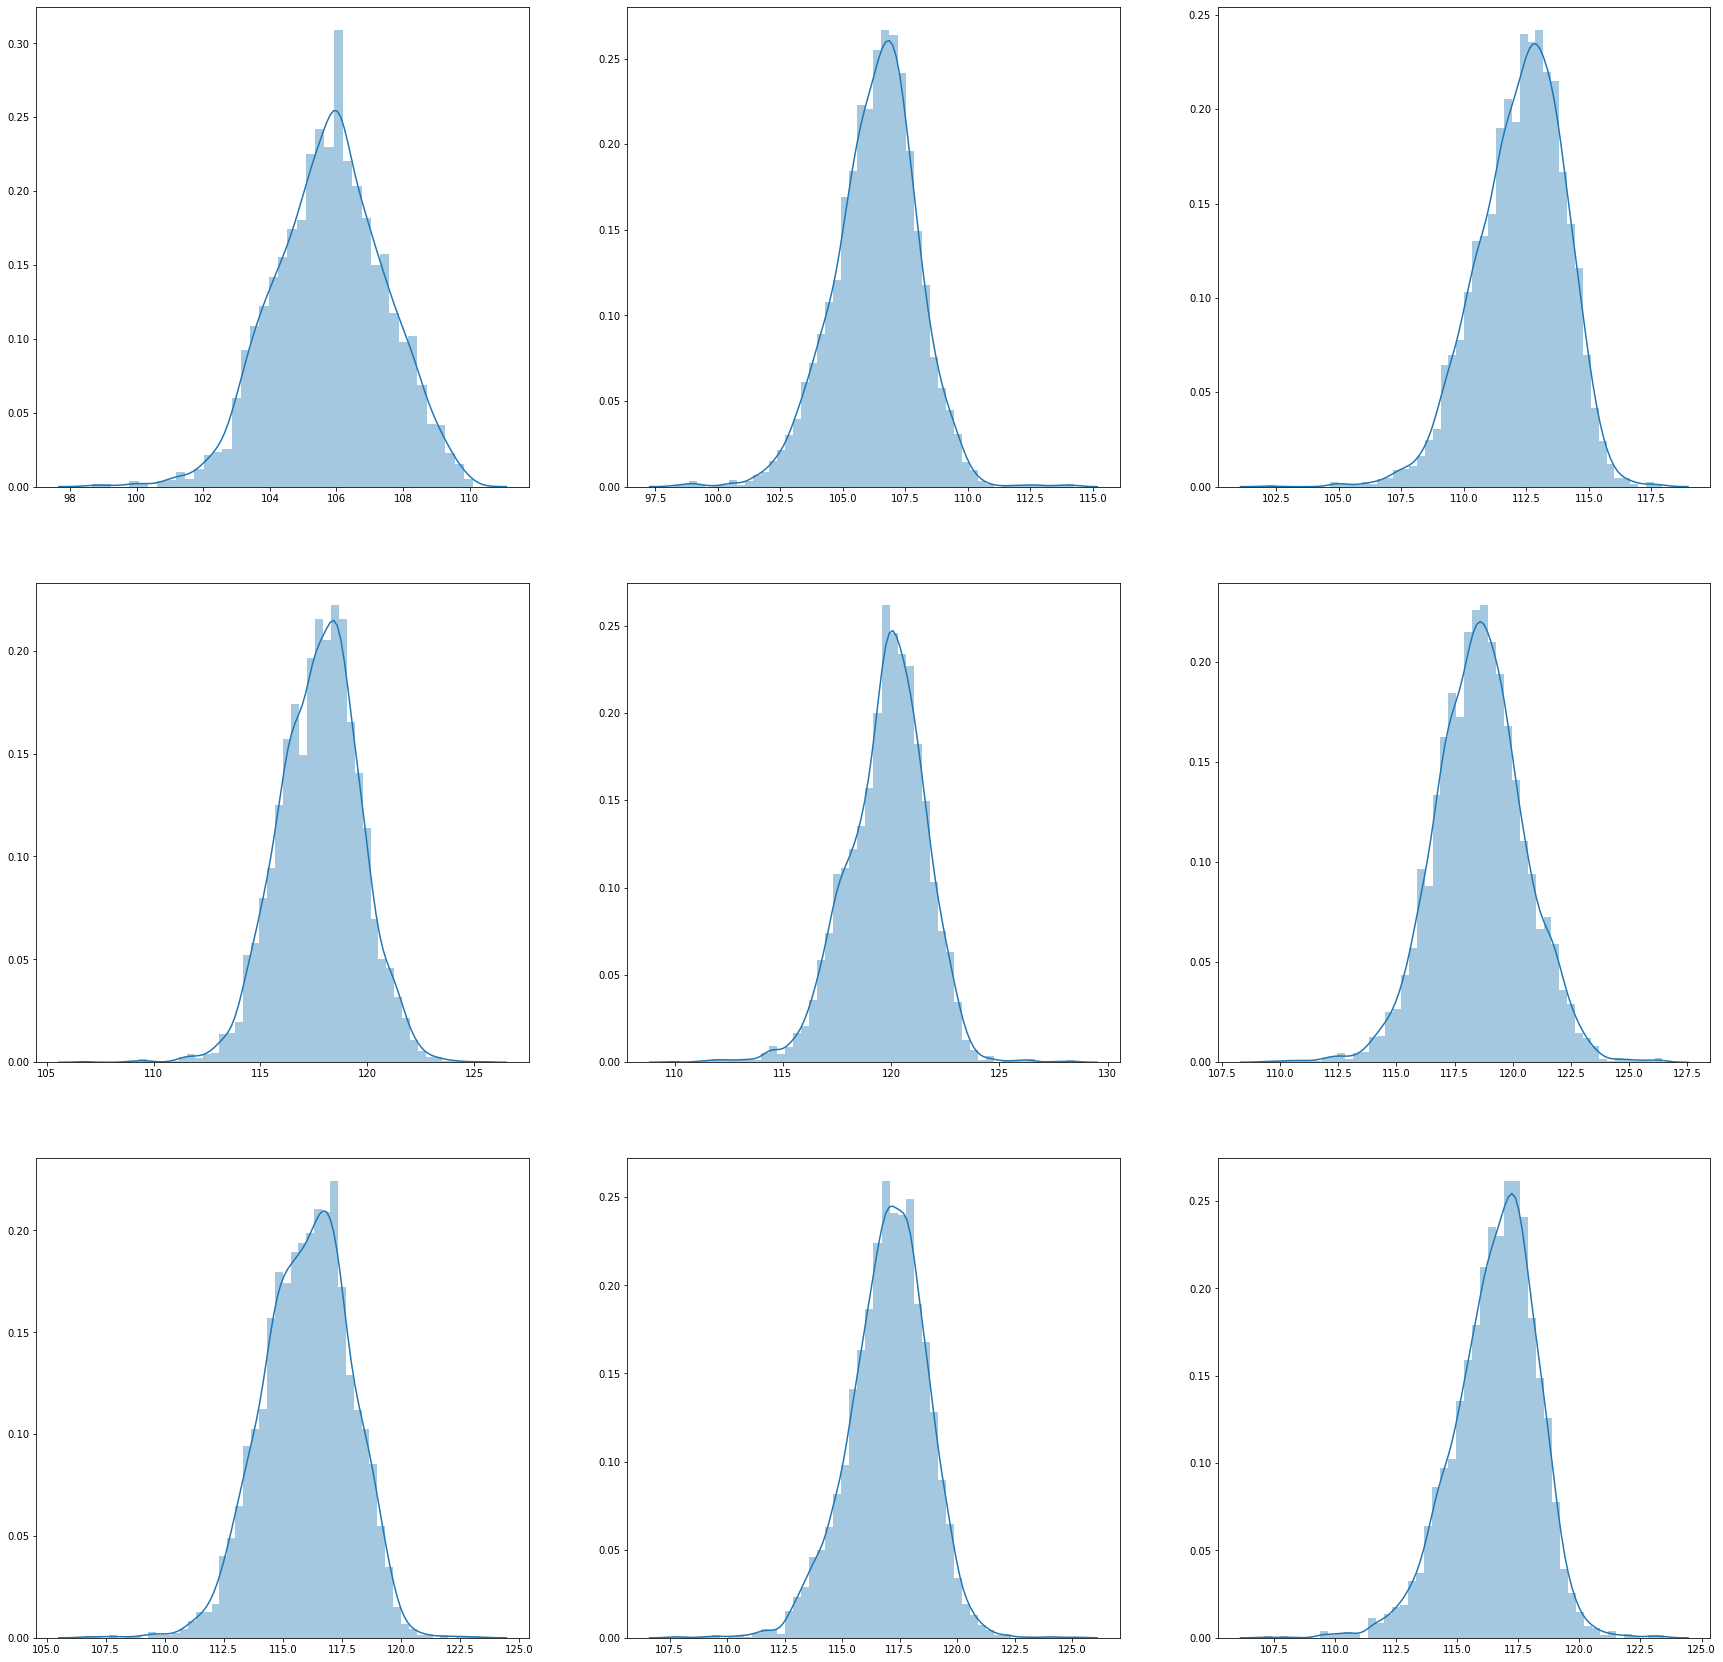

In [123]:
y = 3
x = 3
fig,ax = plt.subplots(y,x,figsize=(30,30))
count = 0
for i in range(y):
    for j in range(x):
        if count >= 9:
            break
        dummy = sns.distplot(original_data[count], ax=ax[i, j])
        count += 1
    if count >= 9:
        break

plt.show()

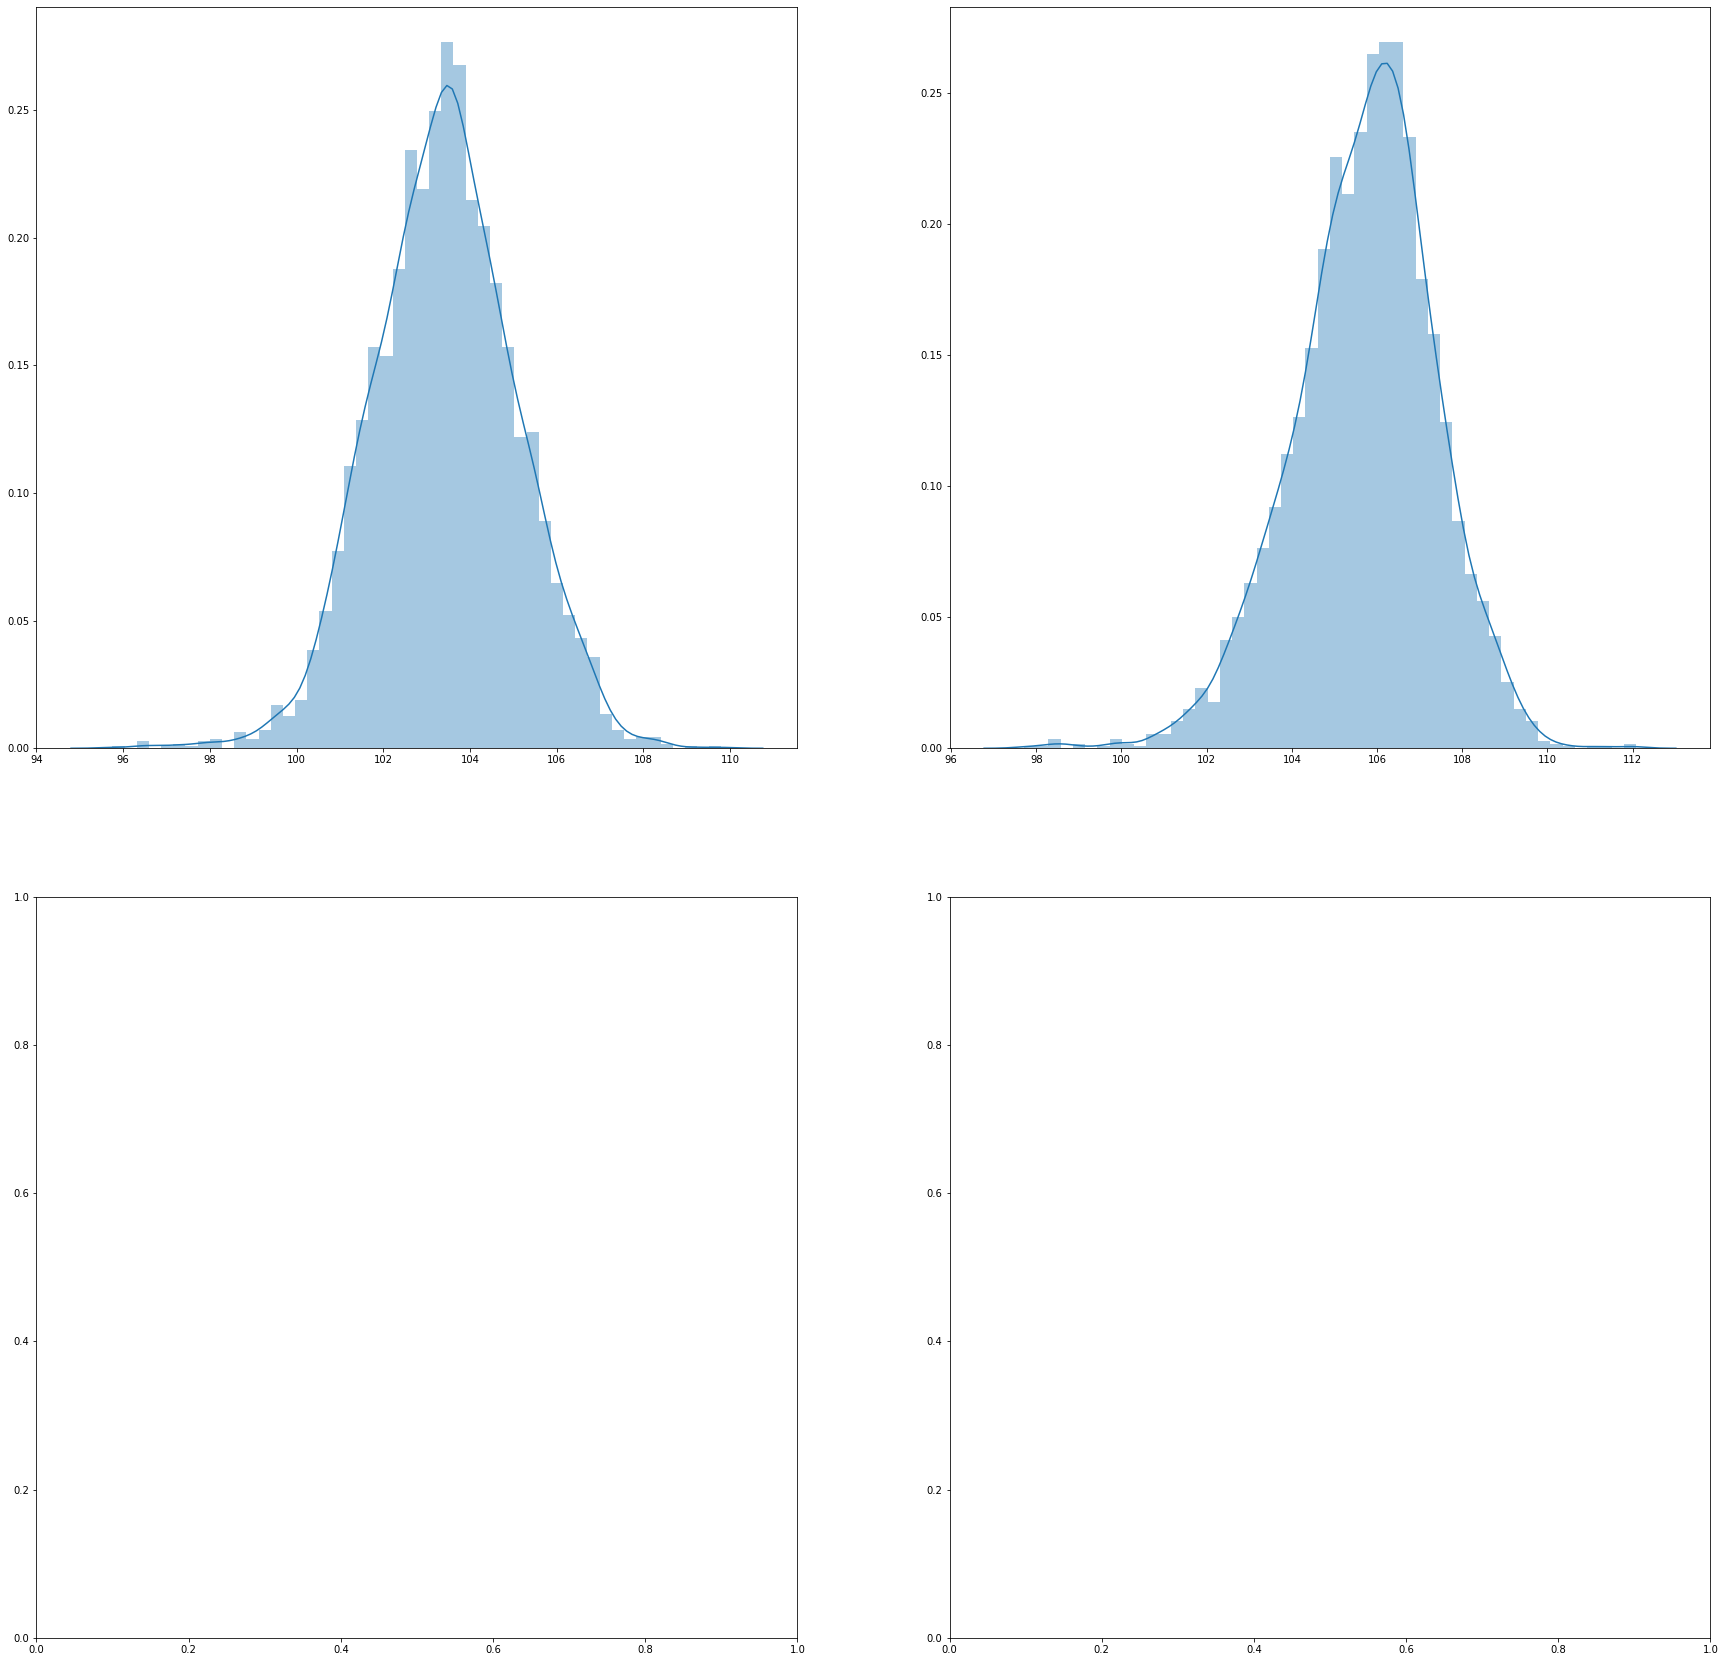

In [134]:
y = 2
x = 2
fig,ax = plt.subplots(y,x,figsize=(30,30))
count = 50
for i in range(y):
    for j in range(x):
        if count >= 52:
            break
        dummy = sns.distplot(original_data[count], ax=ax[i, j])
        count += 1
    if count >= 52:
        break

plt.show()

QQプロット

[fresh]


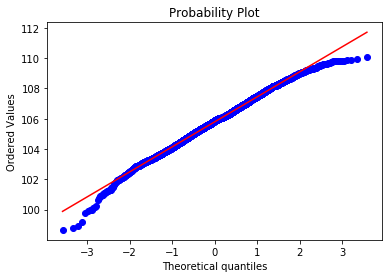

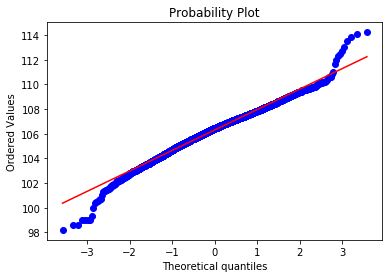

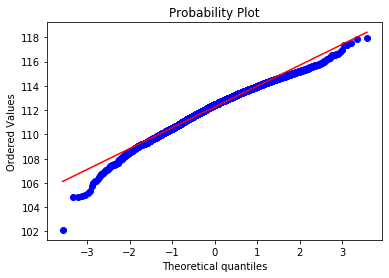

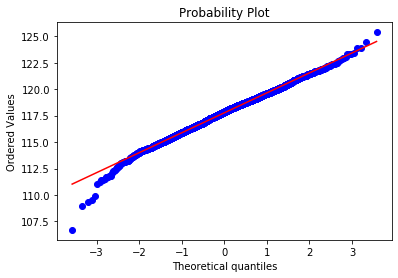

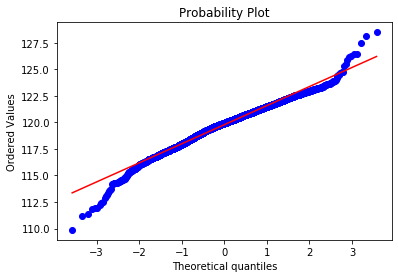

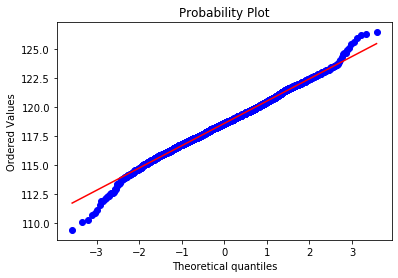


[aged]


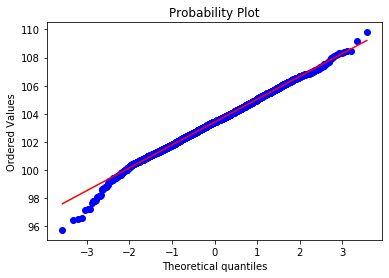

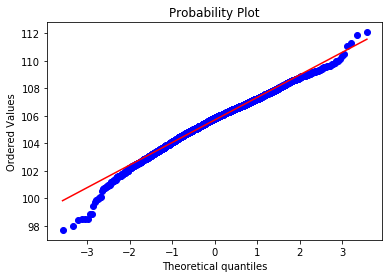

In [207]:
"""QQプロット"""

def check_norm_qq(x):
    stats.probplot(x, dist="norm", plot=plt)#QQプロット表示
    plt.pause(.01)
    print()
    
print('QQプロット')
print()

print('[fresh]')
for i in range(6):
    check_norm(original_data[i])

print('[aged]')
for i in range(50, 52):
    check_norm(original_data[i])

In [213]:
print('コルモゴロフスミルノフ検定')
print()

print('[fresh]')
for i in range(6):
    loc, scale = norm.fit(original_data[i])
    # create a normal distribution with loc and scale
    n = norm(loc=loc, scale=scale)
    p = stats.kstest(original_data[i], n.cdf).pvalue
    print(p)#コルモゴロフスミルノフ検定
    print()
    
print('-----------------------------------------------------------------------------') 
print()

print('[aged]')
for i in range(50,52):
    loc, scale = norm.fit(original_data[i])
    # create a normal distribution with loc and scale
    n = norm(loc=loc, scale=scale)
    p = stats.kstest(original_data[i], n.cdf).pvalue
    print(p)#コルモゴロフスミルノフ検定
    print()

コルモゴロフスミルノフ検定

[fresh]
0.17664074847314698

7.78987420010969e-05

9.001053222443759e-07

0.014580104332488901

1.0382481635824987e-08

0.139126771936037

-----------------------------------------------------------------------------

[aged]
0.5156782058868354

0.00011315372252185875



In [211]:
print('シャピロウィルク検定')
print()

print('[fresh]')
for i in range(6):
    p=stats.shapiro(original_data[i])[1]#シャピロウィルク検定
    print(p)
    print()
    
print('-----------------------------------------------------------------------------') 
print()

print('[aged]')
for i in range(50,52):
    p=stats.shapiro(original_data[i])[1]#シャピロウィルク検定
    print(p)
    print()

シャピロウィルク検定

[fresh]
4.284796961684378e-09

7.951204361789677e-19

4.22764030075411e-20

3.0700930686577976e-10

5.048197248396248e-21

7.711568050794426e-10

-----------------------------------------------------------------------------

[aged]
4.7392410351676517e-07

1.5443250278128213e-16



In [217]:
print('コルモゴロフスミルノフ検定')
print()

counter = 0
for i in range(50):
    loc, scale = norm.fit(original_data[i])
    # create a normal distribution with loc and scale
    n = norm(loc=loc, scale=scale)
    p = stats.kstest(original_data[i], n.cdf).pvalue
    if p > 0.05:
        counter += 1
    
for i in range(50,52):
    loc, scale = norm.fit(original_data[i])
    # create a normal distribution with loc and scale
    n = norm(loc=loc, scale=scale)
    p = stats.kstest(original_data[i], n.cdf).pvalue
    if p > 0.05:
        counter += 1
        
print(counter)
print()

counter = 0
print('シャピロウィルク検定')
print()

for i in range(50):
    p=stats.shapiro(original_data[i])[1]#シャピロウィルク検定
    if p > 0.05:
        counter += 1
    
for i in range(50,52):
    p=stats.shapiro(original_data[i])[1]#シャピロウィルク検定
    if p > 0.05:
        counter += 1
        
print(counter)

コルモゴロフスミルノフ検定

5

シャピロウィルク検定

0


これは正規分布ではないだろうとわかった

In [220]:
"""データ生成"""
data, aged_data = generate_data('fresh_aged_ieice', 50, 2)

"""dataの0->None"""
check = []
for i in range(data.shape[0]):
    tmp = []
    for j in range(data[i].shape[0]):
        for k in range(data[i].shape[1]):
            if data[i, j, k] == 0:
                tmp.append([j,k])
                data[i, j, k] = None
                
    check.append(tmp)
check = np.array(check)
    
"""aged_dataの0->None"""
for i in range(aged_data.shape[0]):
    for j in range(check[0].shape[0]):
        aged_data[i, check[0, j, 0], check[0, j, 1]] = None
        
"""一次元のデータに直す"""
fresh_aged = []
for i in range(50):
    fresh_aged.append(data[i].flatten())
    
for i in range(2):
    fresh_aged.append(aged_data[i].flatten())
    
fresh_aged = np.array(fresh_aged)

"""nanの要素を取り除く"""
original_data = []
for i in range(52):
    tmp = copy.deepcopy(fresh_aged[i])
    tmp2 = tmp[~np.isnan(tmp)]
    original_data.append(tmp2)
    
original_data = np.array(original_data)

print(original_data.shape)

(52, 3964)


In [283]:
def generate_residual_data(data_n, data):
    """
    測定値-推定値(周りの平均)
    残差を求めてデータ生成
    """
    tmp_x = [0, 1, 0, -1]
    tmp_y = [-1, 0, 1, 0]

    residual_data = np.zeros_like(data)

    for i in range(data_n):
        for j in range(data[i].shape[0]):
            for k in range(data[i].shape[1]):
                if np.isnan(data[i, j, k]):
                    residual_data[i, j, k] = None
                else:
                    data_list = []
                    for l in range(4):
                        next_y = j + tmp_y[l]
                        next_x = k + tmp_x[l]
                        if 0 <= next_y < 148 and 0 <= next_x < 33 and not np.isnan(data[i, next_y, next_x]):
                            data_list.append(data[i, next_y, next_x])
    
                    data_mean = mean(data_list)
                    residual_data[i, j, k] = abs(data[i, j, k] - data_mean)

    return residual_data

In [300]:
"""データ生成"""
data, aged_data = generate_data('fresh_aged_ieice', 50, 2)

"""dataの0->None"""
check = []
for i in range(data.shape[0]):
    tmp = []
    for j in range(data[i].shape[0]):
        for k in range(data[i].shape[1]):
            if data[i, j, k] == 0:
                tmp.append([j,k])
                data[i, j, k] = None
                
    check.append(tmp)
check = np.array(check)
    
"""aged_dataの0->None"""
for i in range(aged_data.shape[0]):
    for j in range(check[0].shape[0]):
        aged_data[i, check[0, j, 0], check[0, j, 1]] = None
        
residual_data = generate_residual_data(50, data)
aged_residual_data = generate_residual_data(2, aged_data)

In [301]:
"""nanの数"""

print('fresh')
for i in range(residual_data.shape[0]):
    counter = 0
    for j in range(residual_data[i].shape[0]):
        for k in range(residual_data[i].shape[1]):
            if np.isnan(residual_data[i,j,k]):
                counter += 1
                
    print(counter)
                
    
print('-------------')
    
print('aged')
for i in range(aged_residual_data.shape[0]):
    counter = 0
    for j in range(aged_residual_data[i].shape[0]):
        for k in range(aged_residual_data[i].shape[1]):
            if np.isnan(aged_residual_data[i,j,k]):
                counter += 1
                
    print(counter)

fresh
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
920
-------------
aged
920
920


In [286]:
"""一次元のデータに直す"""
fresh_aged = []
for i in range(50):
    fresh_aged.append(residual_data[i].flatten())
    
for i in range(2):
    fresh_aged.append(aged_residual_data[i].flatten())
    
fresh_aged = np.array(fresh_aged)

"""nanの要素を取り除く"""
good_residual_data = []
for i in range(52):
    tmp = copy.deepcopy(fresh_aged[i])
    tmp2 = tmp[~np.isnan(tmp)]
    good_residual_data.append(tmp2)
    
good_residual_data = np.array(good_residual_data)

print(good_residual_data.shape)

(52, 3964)


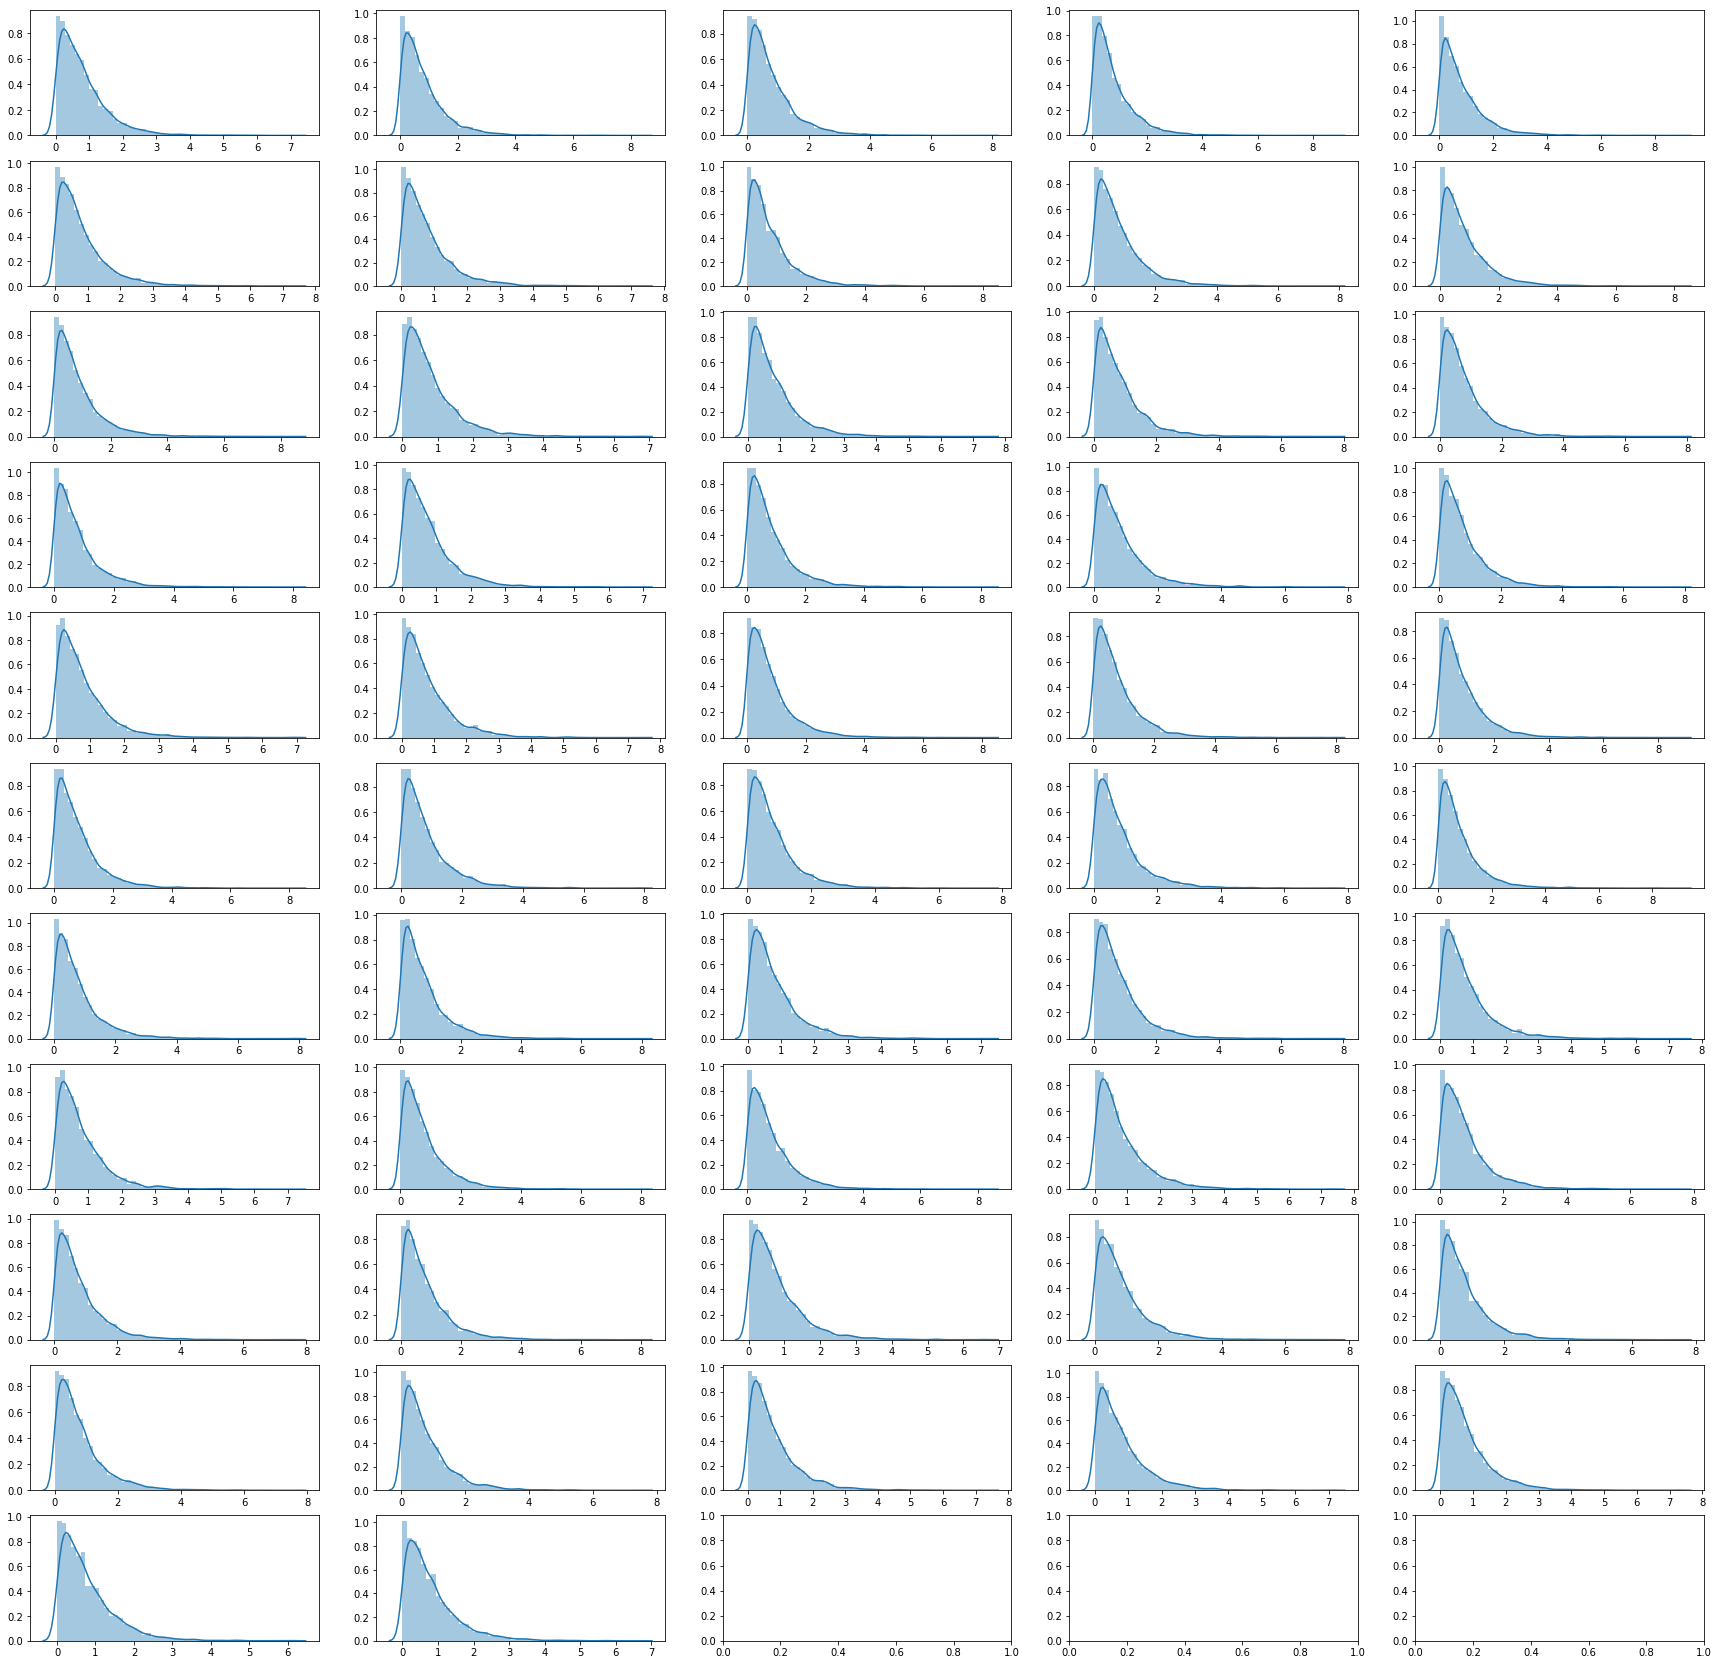

In [287]:
y = 11
x = 5
fig,ax = plt.subplots(y,x,figsize=(30,30))
count = 0
for i in range(y):
    for j in range(x):
        if count >= 52:
            break
        dummy = sns.distplot(good_residual_data[count], ax=ax[i, j])
        count += 1
    if count >= 52:
        break

plt.show()

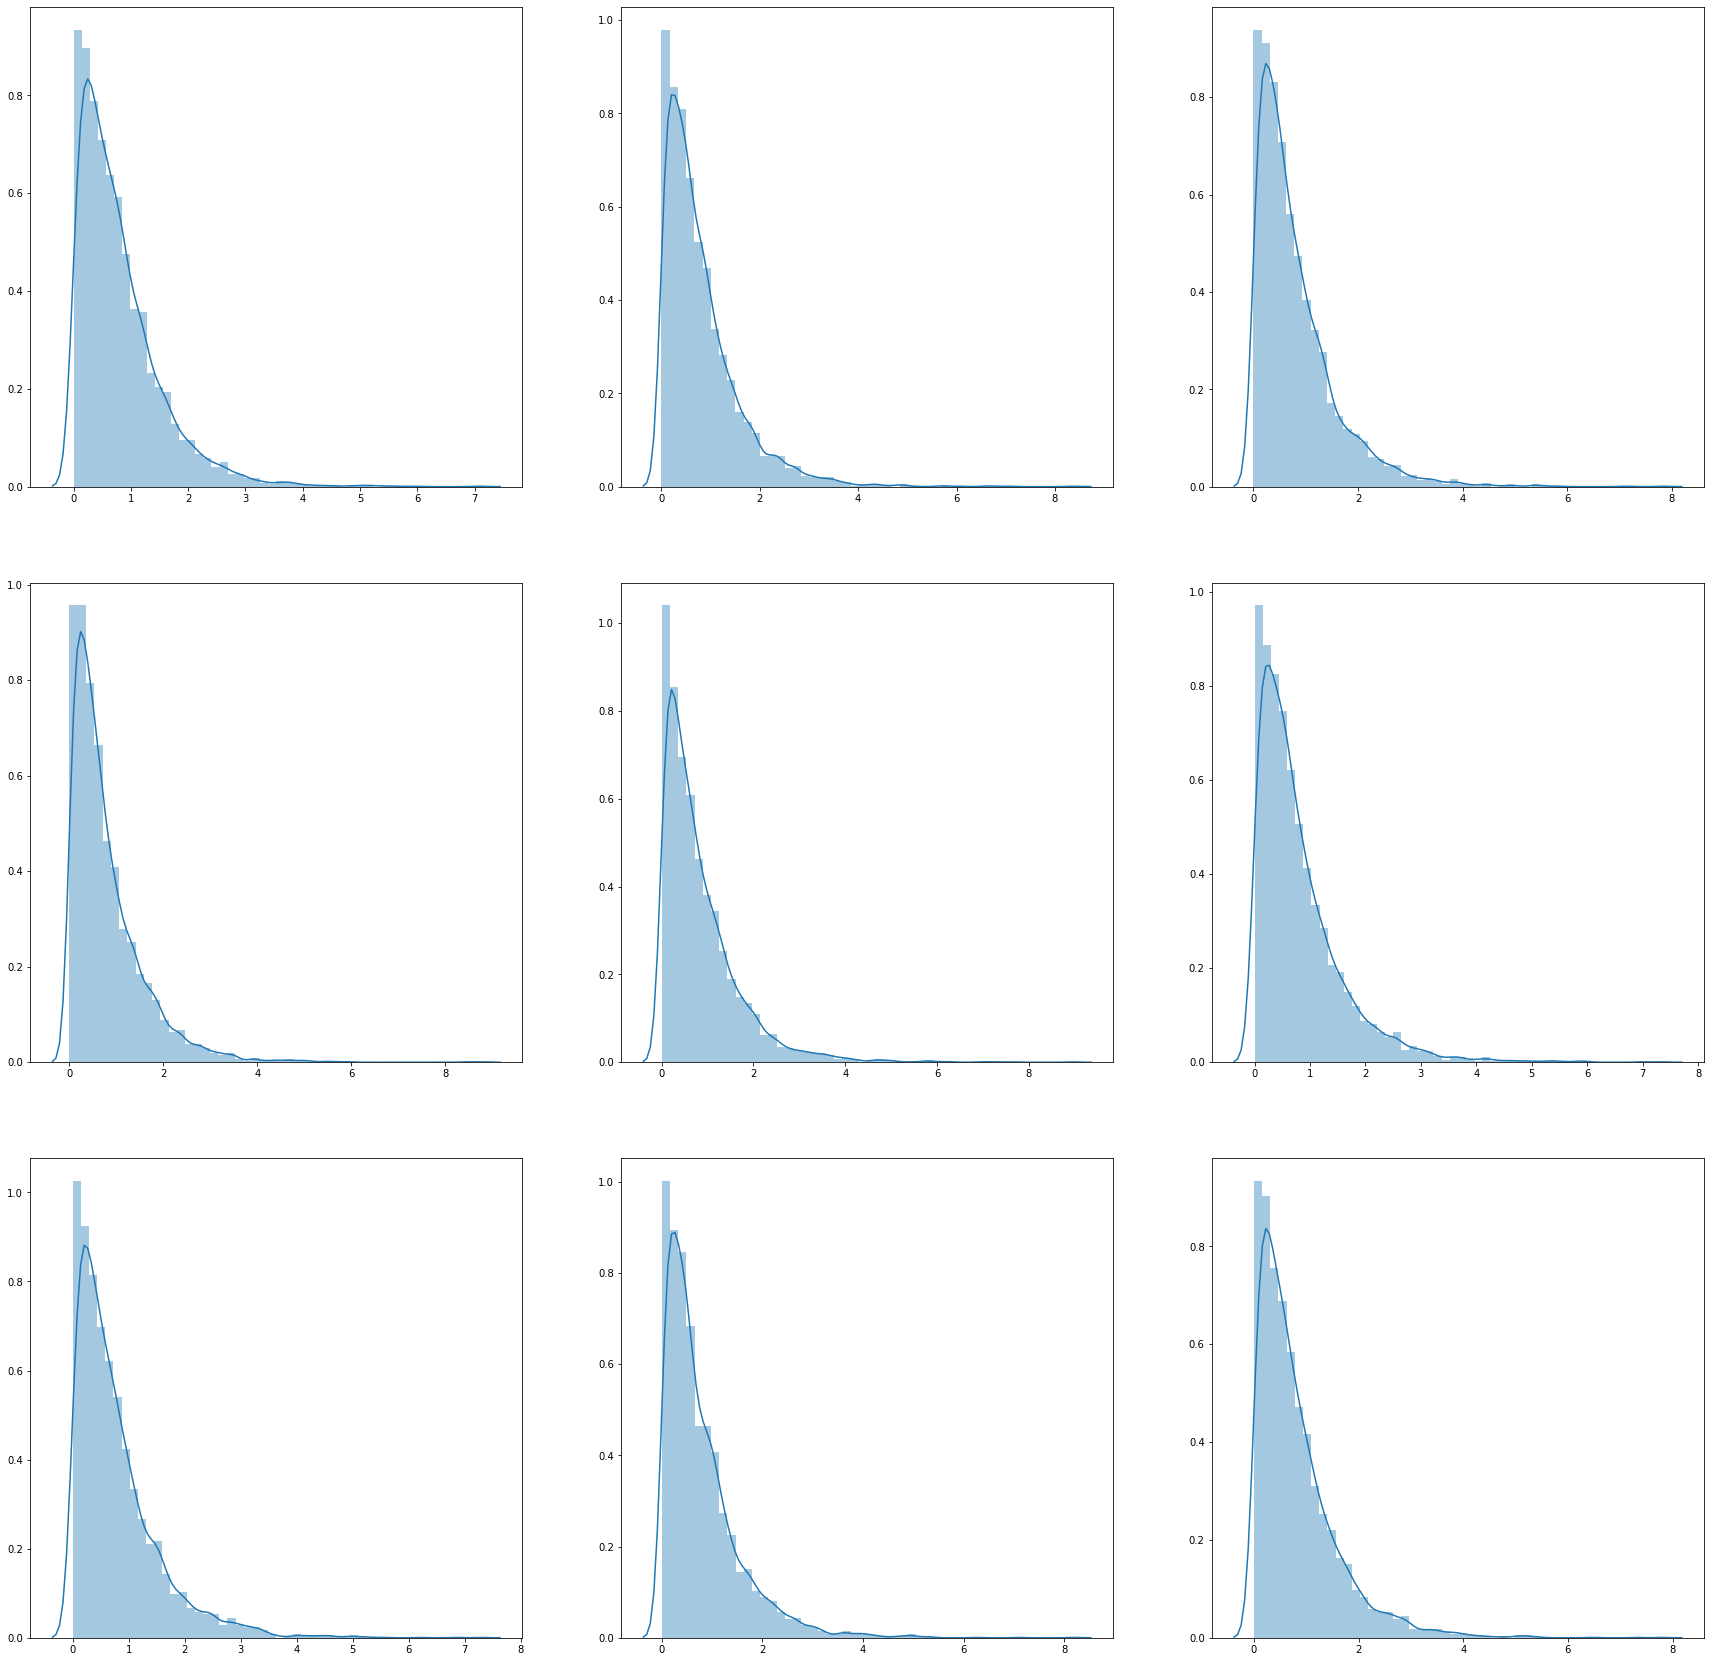

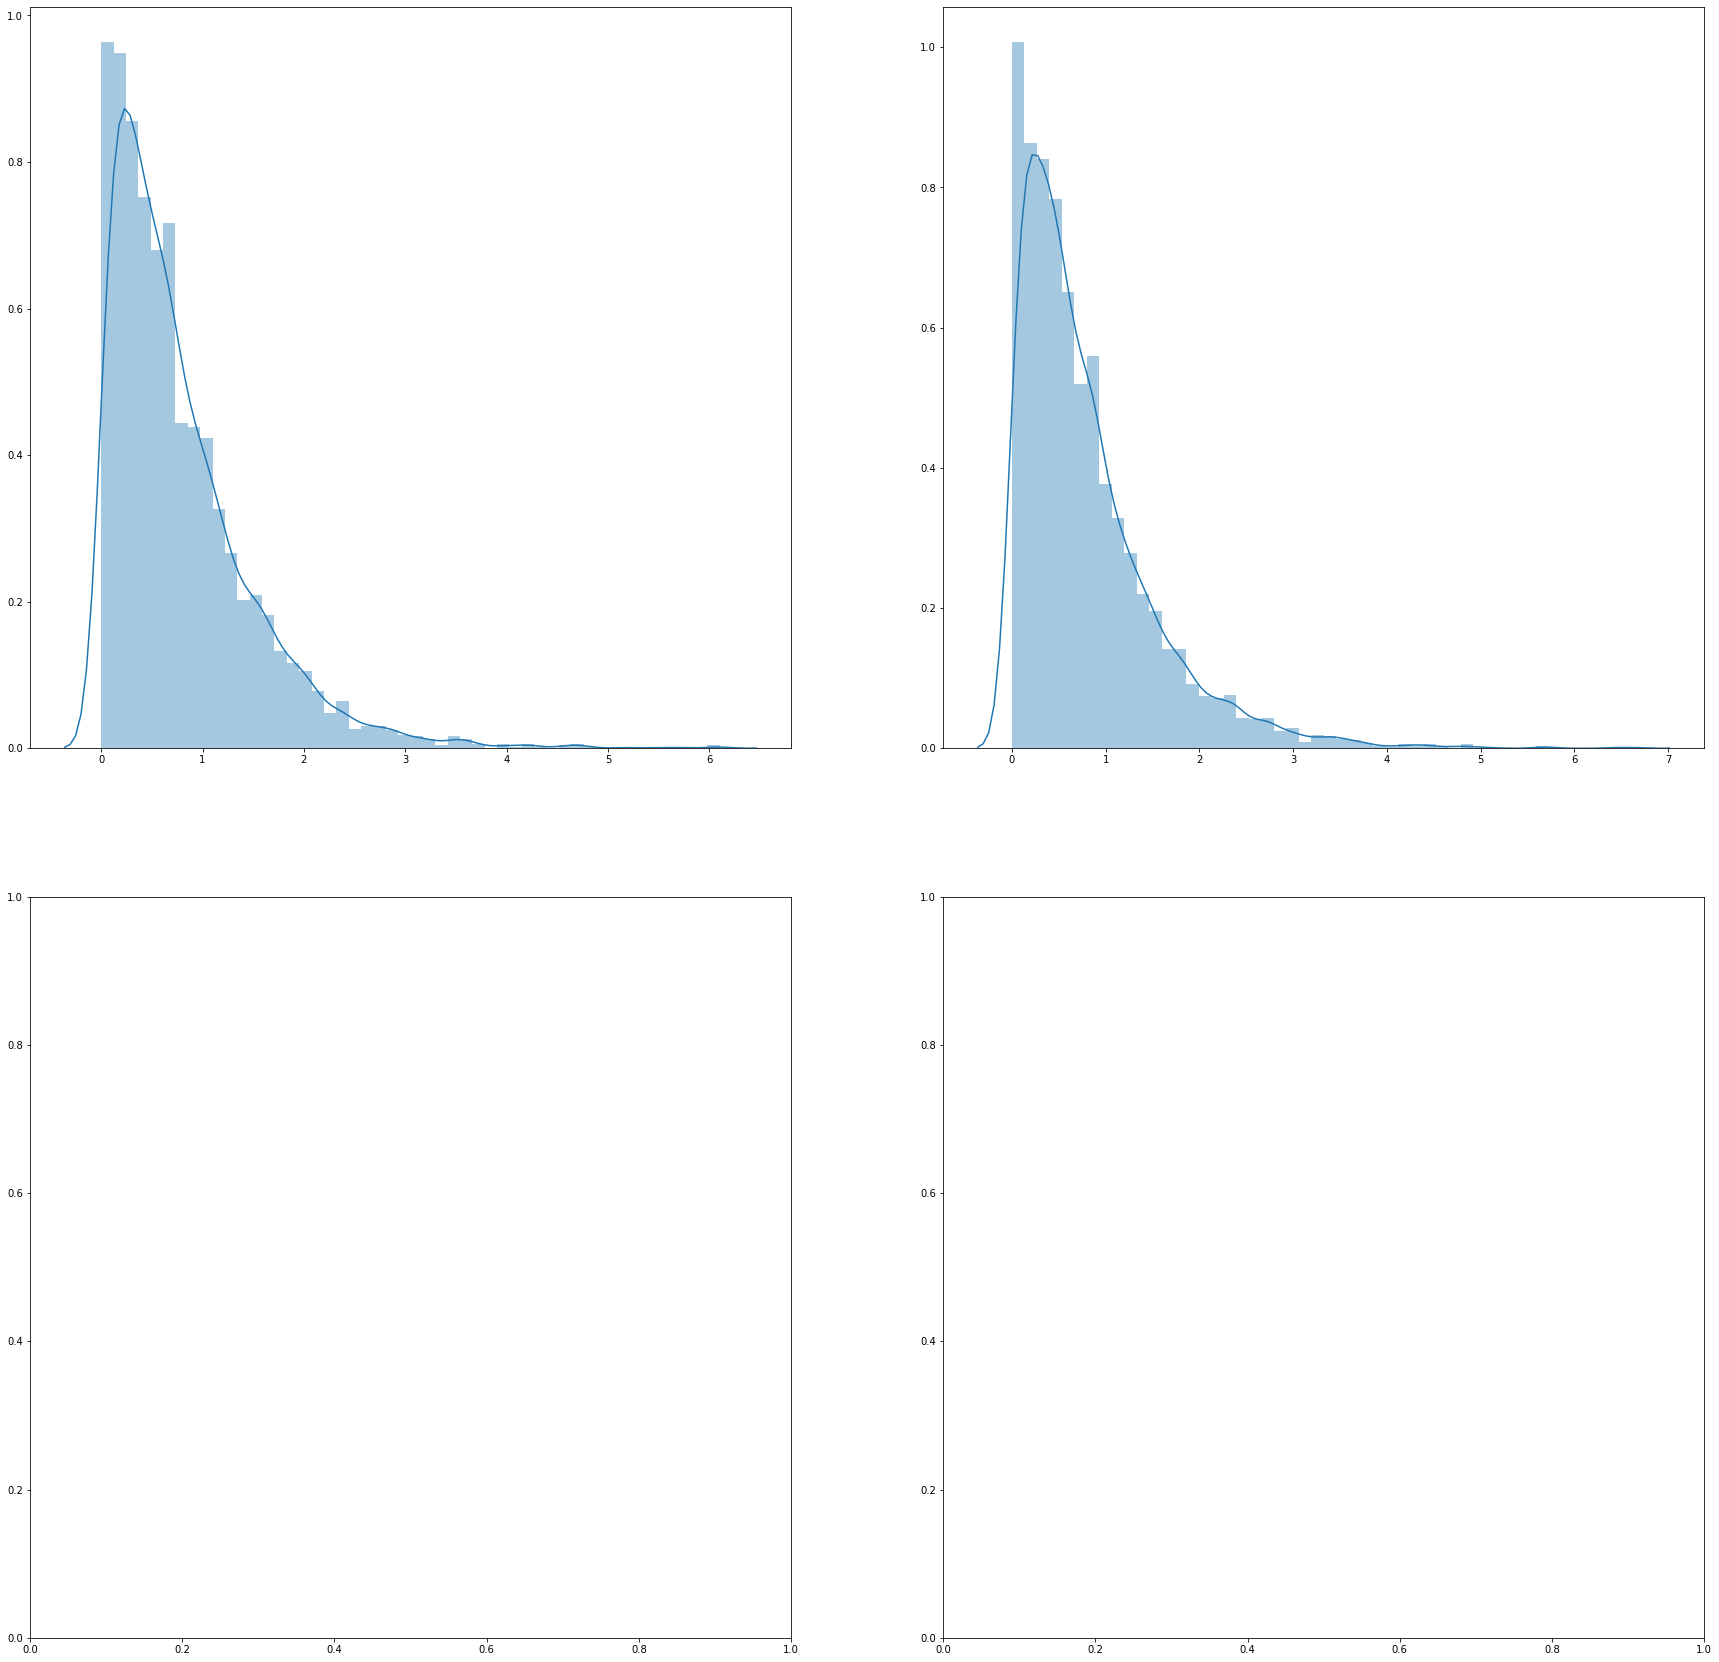

In [288]:
y = 3
x = 3
fig,ax = plt.subplots(y,x,figsize=(30,30))
count = 0
for i in range(y):
    for j in range(x):
        if count >= 9:
            break
        dummy = sns.distplot(good_residual_data[count], ax=ax[i, j])
        count += 1
    if count >= 9:
        break

plt.show()

y = 2
x = 2
fig,ax = plt.subplots(y,x,figsize=(30,30))
count = 50
for i in range(y):
    for j in range(x):
        if count >= 52:
            break
        dummy = sns.distplot(good_residual_data[count], ax=ax[i, j])
        count += 1
    if count >= 52:
        break

plt.show()

QQプロット

[fresh]


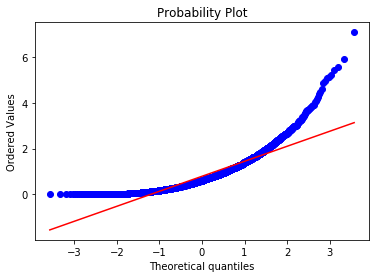

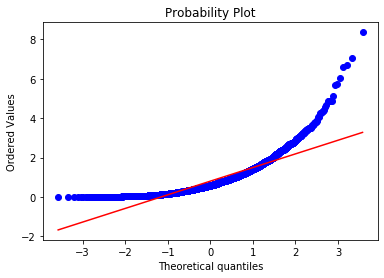

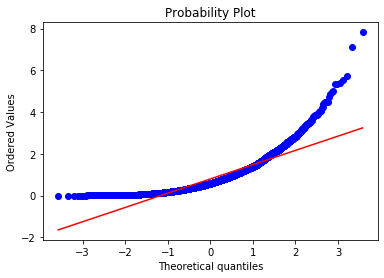

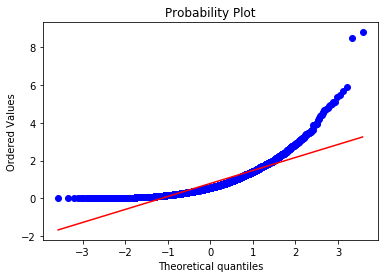

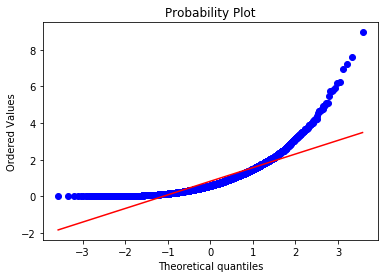

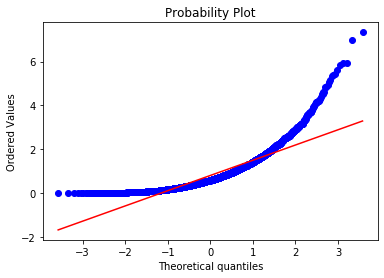


[aged]


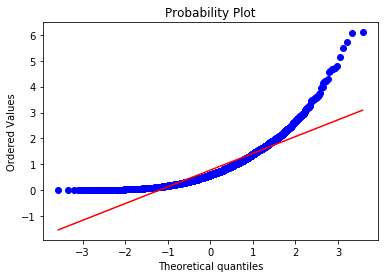

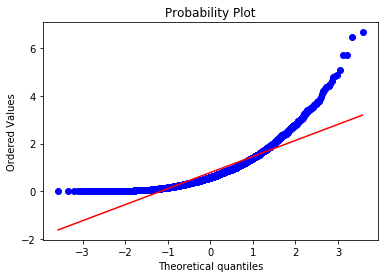

In [289]:
"""QQプロット"""

def check_norm_qq(x):
    stats.probplot(x, dist="norm", plot=plt)#QQプロット表示
    plt.pause(.01)
    print()
    
print('QQプロット')
print()

print('[fresh]')
for i in range(6):
    check_norm(good_residual_data[i])

print('[aged]')
for i in range(50, 52):
    check_norm(good_residual_data[i])

In [290]:
print('コルモゴロフスミルノフ検定')
print()

print('[fresh]')
for i in range(6):
    loc, scale = norm.fit(good_residual_data[i])
    # create a normal distribution with loc and scale
    n = norm(loc=loc, scale=scale)
    p = stats.kstest(good_residual_data[i], n.cdf).pvalue
    print(p)#コルモゴロフスミルノフ検定
    print()
    
print('-----------------------------------------------------------------------------') 
print()

print('[aged]')
for i in range(50,52):
    loc, scale = norm.fit(good_residual_data[i])
    # create a normal distribution with loc and scale
    n = norm(loc=loc, scale=scale)
    p = stats.kstest(good_residual_data[i], n.cdf).pvalue
    print(p)#コルモゴロフスミルノフ検定
    print()

コルモゴロフスミルノフ検定

[fresh]
8.494556423282054e-63

4.1899444562170257e-76

1.1294073824604967e-73

4.390478318666434e-81

3.8979466249525285e-87

5.576115538245464e-78

-----------------------------------------------------------------------------

[aged]
2.5243880776223168e-64

3.9488211392345206e-70



In [291]:
print('シャピロウィルク検定')
print()

print('[fresh]')
for i in range(6):
    p=stats.shapiro(original_data[i])[1]#シャピロウィルク検定
    print(p)
    print()
    
print('-----------------------------------------------------------------------------') 
print()

print('[aged]')
for i in range(50,52):
    p=stats.shapiro(original_data[i])[1]#シャピロウィルク検定
    print(p)
    print()

シャピロウィルク検定

[fresh]
4.284796961684378e-09

7.951204361789677e-19

4.22764030075411e-20

3.0700930686577976e-10

5.048197248396248e-21

7.711568050794426e-10

-----------------------------------------------------------------------------

[aged]
4.7392410351676517e-07

1.5443250278128213e-16



In [292]:
print('コルモゴロフスミルノフ検定')
print()

counter = 0
for i in range(50):
    loc, scale = norm.fit(good_residual_data[i])
    # create a normal distribution with loc and scale
    n = norm(loc=loc, scale=scale)
    p = stats.kstest(good_residual_data[i], n.cdf).pvalue
    if p > 0.05:
        counter += 1
    
for i in range(50,52):
    loc, scale = norm.fit(good_residual_data[i])
    # create a normal distribution with loc and scale
    n = norm(loc=loc, scale=scale)
    p = stats.kstest(good_residual_data[i], n.cdf).pvalue
    if p > 0.05:
        counter += 1
        
print(counter)
print()

counter = 0
print('シャピロウィルク検定')
print()

for i in range(50):
    p=stats.shapiro(good_residual_data[i])[1]#シャピロウィルク検定
    if p > 0.05:
        counter += 1
    
for i in range(50,52):
    p=stats.shapiro(good_residual_data[i])[1]#シャピロウィルク検定
    if p > 0.05:
        counter += 1
        
print(counter)

コルモゴロフスミルノフ検定

0

シャピロウィルク検定

0


In [293]:
sum_residual_data = []
#for i in range(52):
#    tmp = 0
#    for j in range(len(good_residual_data[i])):
#        tmp += abs(good_residual_data[i, j])
#    
#    sum_residual_data.append(tmp)

for i in range(52):
    sum_residual_data.append(sum(good_residual_data[i]))
        
sum_residual_data = np.array(sum_residual_data)

print(sum_residual_data)
print(sum_residual_data.shape)

[3125.828675   3182.70785833 3156.90739167 3117.45353333 3293.37175833
 3171.81964167 3102.78718333 3117.15046667 3244.417525   3270.59586667
 3318.8778     3152.833175   3129.05948333 3144.85939167 3093.33420833
 3059.086      3052.861225   3217.21263333 3189.60373333 3044.987925
 3075.8184     3200.82458333 3225.44814167 3115.10338333 3353.62544167
 3186.42885833 3249.409275   3118.14133333 3187.518725   3164.29664167
 3072.13883333 3110.16070833 3119.84771667 3220.640775   3131.46144167
 3056.73879167 3100.76555833 3251.896525   3296.58911667 3173.90854167
 3096.65246667 3211.0986     3077.50475    3307.97119167 3075.08148333
 3195.79605833 3096.18595    3099.34143333 3116.95261667 3128.33130833
 3075.28925    3123.23816667]
(52,)


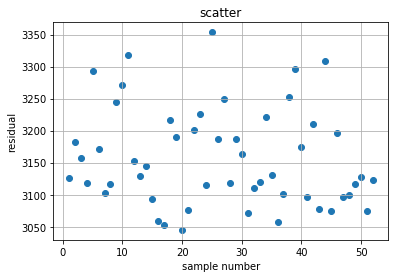

In [294]:
x = np.arange(1, 53)
plt.scatter(x, sum_residual_data)
plt.title("scatter")
plt.xlabel("sample number")
plt.ylabel("residual")
plt.grid(True)
plt.show()

QQプロット



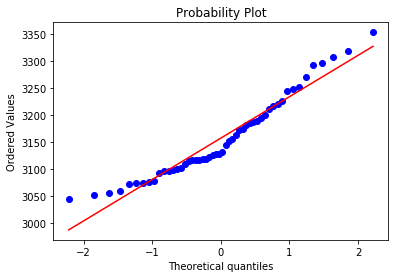

In [295]:
"""QQプロット"""

def check_norm_qq(x):
    stats.probplot(x, dist="norm", plot=plt)#QQプロット表示
    plt.pause(.01)
    print()
    
print('QQプロット')
print()

check_norm_qq(sum_residual_data)

In [296]:
print('コルモゴロフスミルノフ検定')
print()

loc, scale = norm.fit(sum_residual_data)
# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)
p = stats.kstest(sum_residual_data, n.cdf).pvalue
print(p)#コルモゴロフスミルノフ検定
print()
    

コルモゴロフスミルノフ検定

0.15127205560844512



In [297]:
print('シャピロウィルク検定')
print()

p=stats.shapiro(sum_residual_data)[1]#シャピロウィルク検定
print(p)
print()

シャピロウィルク検定

0.012513765133917332



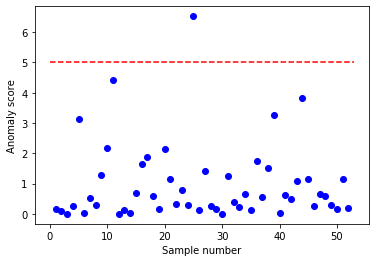

異常index：25


In [298]:
# 標本平均
mn = mean(sum_residual_data)

# 標本分散
vari = variance(sum_residual_data)

# 異常度
anomaly_scores = []
for x in sum_residual_data:
    anomaly_score = (x - mn)**2 / vari
    anomaly_scores.append(anomaly_score)

# カイ二乗分布による5%水準の閾値
threshold = stats.chi2.interval(0.95, 1)[1]

# 結果の描画
num = np.arange(1, 53)
plt.plot(num, anomaly_scores, "o", color = "b")
plt.plot([0,53],[threshold, threshold], 'k-', color = "r", ls = "dashed")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.show()

for i, j in enumerate(anomaly_scores):
    if j >= threshold:
        print(f'異常index：{i+1}')